### Lab 5: Simple Regression

#### Gabriella Rivera

#### 1 Global Temperature Trend

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
uah = pd.read_csv("UAH-lower-troposphere-wide.csv.bz2", sep = "\t")
uah

,year,month,globe,globe_land,globe_ocean,nh,nh_land,nh_ocean,sh,sh_land,...,soext_ocean,nopol,nopol_land,nopol_ocean,sopol,sopol_land,sopol_ocean,usa48,usa49,aust
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.47,-0.43,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.46,-0.38,-0.49,-1.29,-1.15,-1.30
1,1979,1,-0.48,-0.64,-0.41,-0.64,-0.87,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.23,-2.42,0.92
2,1979,2,-0.44,-0.56,-0.39,-0.48,-0.57,-0.42,-0.40,-0.53,...,-0.36,-2.01,-2.30,-1.66,-0.80,-1.25,-0.59,-1.77,-1.85,-0.30
3,1979,3,-0.39,-0.52,-0.33,-0.47,-0.51,-0.44,-0.31,-0.53,...,-0.21,-0.56,-0.47,-0.66,-0.53,-1.25,-0.18,-0.70,-0.39,0.22
4,1979,4,-0.41,-0.57,-0.34,-0.47,-0.62,-0.38,-0.34,-0.46,...,-0.31,-0.84,-0.81,-0.88,-0.26,0.26,-0.51,-0.73,-0.46,-1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023,11,0.91,1.12,0.83,1.01,1.31,0.81,0.82,0.70,...,0.75,1.16,1.61,0.64,-0.23,-0.90,0.09,0.65,0.75,0.42
540,2023,12,0.83,1.07,0.74,0.93,1.21,0.76,0.73,0.77,...,0.56,0.26,0.22,0.30,0.05,-0.35,0.24,1.26,0.92,0.86
541,2024,1,0.86,0.89,0.85,1.06,1.03,1.08,0.66,0.58,...,0.41,0.40,0.24,0.58,-0.24,-1.01,0.12,-0.05,0.09,1.18
542,2024,2,0.93,0.98,0.91,1.03,1.01,1.04,0.83,0.93,...,0.60,0.88,0.73,1.06,0.19,-0.21,0.39,1.37,1.19,1.07


2.

In [7]:
year = 12
month = 1
time = year + (month - 1) / 12
uah['time'] = uah['year'] + (uah['month'] - 1) / 12
uah

,year,month,globe,globe_land,globe_ocean,nh,nh_land,nh_ocean,sh,sh_land,...,nopol,nopol_land,nopol_ocean,sopol,sopol_land,sopol_ocean,usa48,usa49,aust,time
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.47,-0.43,-0.52,-0.62,...,-0.39,-0.68,-0.06,-0.46,-0.38,-0.49,-1.29,-1.15,-1.30,1978.916667
1,1979,1,-0.48,-0.64,-0.41,-0.64,-0.87,-0.50,-0.31,-0.13,...,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.23,-2.42,0.92,1979.000000
2,1979,2,-0.44,-0.56,-0.39,-0.48,-0.57,-0.42,-0.40,-0.53,...,-2.01,-2.30,-1.66,-0.80,-1.25,-0.59,-1.77,-1.85,-0.30,1979.083333
3,1979,3,-0.39,-0.52,-0.33,-0.47,-0.51,-0.44,-0.31,-0.53,...,-0.56,-0.47,-0.66,-0.53,-1.25,-0.18,-0.70,-0.39,0.22,1979.166667
4,1979,4,-0.41,-0.57,-0.34,-0.47,-0.62,-0.38,-0.34,-0.46,...,-0.84,-0.81,-0.88,-0.26,0.26,-0.51,-0.73,-0.46,-1.12,1979.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023,11,0.91,1.12,0.83,1.01,1.31,0.81,0.82,0.70,...,1.16,1.61,0.64,-0.23,-0.90,0.09,0.65,0.75,0.42,2023.833333
540,2023,12,0.83,1.07,0.74,0.93,1.21,0.76,0.73,0.77,...,0.26,0.22,0.30,0.05,-0.35,0.24,1.26,0.92,0.86,2023.916667
541,2024,1,0.86,0.89,0.85,1.06,1.03,1.08,0.66,0.58,...,0.40,0.24,0.58,-0.24,-1.01,0.12,-0.05,0.09,1.18,2024.000000
542,2024,2,0.93,0.98,0.91,1.03,1.01,1.04,0.83,0.93,...,0.88,0.73,1.06,0.19,-0.21,0.39,1.37,1.19,1.07,2024.083333


3.

<Axes: xlabel='year', ylabel='globe'>

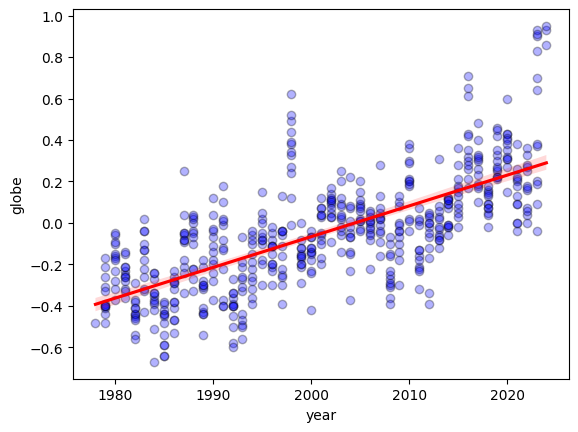

In [9]:
sns.regplot(data=uah, y = "globe", x = "year",
            scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
            line_kws={"color":"red"})

4.

Yes, the line on the plot seems to be a good approximation for the actual temperature trend.

5.

In [12]:
model = smf.ols("globe ~ time", data=uah).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  globe   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     550.4
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.58e-84
Time:                        22:02:00   Log-Likelihood:                 123.80
No. Observations:                 544   AIC:                            -243.6
Df Residuals:                     542   BIC:                            -235.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.7528      1.266    -23.499      0.0

6.

The p-value for the time coefficient is 0.000, which is very small (typically, a p-value less than 0.05 is considered statistically significant). This indicates strong evidence against the null hypothesis, which would state that the coefficient equals zero (meaning no effect). Thus, we can conclude that the effect of time on globe is statistically significant.

7. 

The intercept represents the expected value of the dependent variable (globe) when all independent variables (time in this case) are set to zero. In the regression output, the intercept is approximately -29.7528. This means that when time is 0, the predicted value of globe would be around -29.7528.

8.

Yes, I got a  similar trend as published. 

#### 2 GDP and Life Expectancy

1.

In [14]:
gm = pd.read_csv("gapminder.csv.bz2", sep = "\t")
gm

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,...,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,...,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13050,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2015.0,13814629.0,3.896,59.534,...,33.70000,162000.0,NaN,799405.0,22.90,12317.453,NaN,0.89162,0.0,NaN
13051,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2016.0,14030390.0,3.804,60.294,...,39.67623,162000.0,NaN,675062.0,32.50,10982.665,NaN,0.78278,0.0,NaN
13052,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2017.0,14236745.0,3.707,60.812,...,40.14428,162000.0,NaN,895073.0,38.35,NaN,NaN,NaN,0.0,NaN
13053,ZWE,Zimbabwe,ZW,Africa,Sub-Saharan Africa,Eastern Africa,2018.0,14439018.0,3.615,61.195,...,40.61636,162000.0,NaN,950627.0,38.35,NaN,NaN,NaN,NaN,NaN


2.

In [28]:
gm_2016 = gm[gm['time'] == 2016.0]
gm_2016

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
56,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,2016.0,104872.0,1.872,75.868,...,100.00000,20.0,NaN,NaN,NaN,883.747,NaN,8.42691,NaN,NaN
116,AFG,Afghanistan,AF,Asia,Southern Asia,NaN,2016.0,35383128.0,4.800,63.763,...,97.70000,379100.0,NaN,5537315.0,13.68015,8672.455,NaN,0.24510,99.63784,17978.0
176,AGO,Angola,AO,Africa,Sub-Saharan Africa,Middle Africa,2016.0,28842484.0,5.686,59.925,...,41.79738,558423.8,NaN,2423924.0,7.24127,34693.487,NaN,1.20286,24.12086,25.0
238,ALB,Albania,AL,Europe,Southern Europe,NaN,2016.0,2876101.0,1.659,78.194,...,99.89000,11817.0,NaN,698430.0,126.13848,4536.079,NaN,1.57716,0.00000,NaN
298,AND,Andorra,AD,Europe,Southern Europe,NaN,2016.0,77297.0,NaN,NaN,...,100.00000,188.2,NaN,NaN,NaN,469.376,NaN,6.07237,0.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,WSM,Samoa,WS,Oceania,Polynesia,NaN,2016.0,194535.0,3.976,72.895,...,99.89780,757.0,NaN,NaN,0.48585,245.689,NaN,1.26296,0.00000,NaN
12871,YEM,Yemen,YE,Asia,Western Asia,NaN,2016.0,27168210.0,3.994,66.087,...,68.91871,233858.0,NaN,357068.0,18.98242,10608.631,NaN,0.39048,100.00000,2846.0
12931,ZAF,South Africa,ZA,Africa,Sub-Saharan Africa,Southern Africa,2016.0,56207649.0,2.457,63.153,...,84.20000,963410.0,NaN,10197534.0,57.25000,476643.994,NaN,8.48006,6.15842,NaN
12991,ZMB,Zambia,ZM,Africa,Sub-Saharan Africa,Eastern Africa,2016.0,16363507.0,4.814,62.464,...,35.17316,238360.0,NaN,3112301.0,63.98556,5141.134,NaN,0.31418,0.00334,NaN


3.

In [29]:
model = smf.ols("GDP_PC ~ lifeExpectancy", data=gm_2016).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 GDP_PC   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     127.2
Date:                Thu, 02 May 2024   Prob (F-statistic):           9.17e-23
Time:                        22:32:18   Log-Likelihood:                -2055.3
No. Observations:                 186   AIC:                             4115.
Df Residuals:                     184   BIC:                             4121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.046e+05   1.06e+04     -9.

4.

Coefficients:

Intercept: The model's intercept is approximately -1.046e+05. This means that if life expectancy were zero (which is not possible in reality and not within the range of the data), the expected GDP per capita would be around -104,600. This intercept doesn't have a practical interpretation given the nature of the data and variables involved.

Life Expectancy: The coefficient for life expectancy is approximately 1650.4528. This suggests that for every additional year of life expectancy, the GDP per capita increases by about 1650.45, holding other factors constant. This reflects the economic value associated with longer life expectancies, possibly due to better health, more prolonged productivity, etc.


Both the intercept and the coefficient for life expectancy are statistically significant, as indicated by their p-values (0.000 for both). This means we can reject the null hypothesis that these coefficients are zero. This indicates that countries with longer life expectancies tend to have higher GDP per capita.